In [247]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [248]:
# loading dataset
data = pd.read_csv('./data/apples_and_oranges.csv')
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [249]:
# splitting data into X and y
X = data.drop('Class', axis=1)
y = data['Class']

In [250]:
X.head()

,Weight,Size
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [251]:
y.head()

0    orange
1    orange
2    orange
3     apple
4    orange
Name: Class, dtype: object

In [252]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [254]:
# Trainig mode
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

SVC(random_state=42)

In [255]:
y_pred = clf.predict(X_test)
y_pred

array(['apple', 'orange', 'orange', 'orange', 'orange', 'apple', 'apple',
       'orange'], dtype=object)

In [256]:
# calculating accuracy
from sklearn.metrics import accuracy_score
print(f'Accuracy is {accuracy_score(y_pred, y_test)}')

Accuracy is 1.0


In [257]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# alternate to accuracy
acc = float(cm.diagonal().sum())/len(y_test)
print(f'Accuracy is {acc}')

Accuracy is 1.0


In [258]:
# encoding y_train values from categorical to numerical vaues
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_num = le.fit_transform(y_train)

In [259]:
# now train model using new y_train model numerical values
clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train_num)

SVC(random_state=42)

In [260]:
# confusion matrix of model
cm = confusion_matrix(y_test, y_pred)

# accuracy
acc = float(cm.diagonal().sum())/len(y_test)
print(f'Accuracy is {acc}')

Accuracy is 1.0


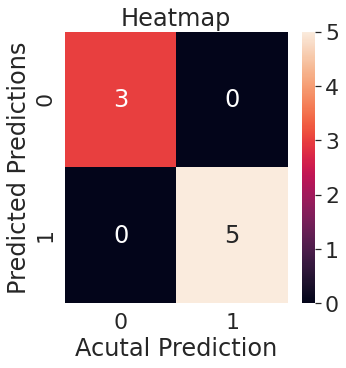

In [261]:
# visualizing confusion matrix
import seaborn as sn
plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True)
 
ax.set(title="Heatmap",
      xlabel="Acutal Prediction",
      ylabel="Predicted Predictions")
sns.set(font_scale=2)
plt.show()

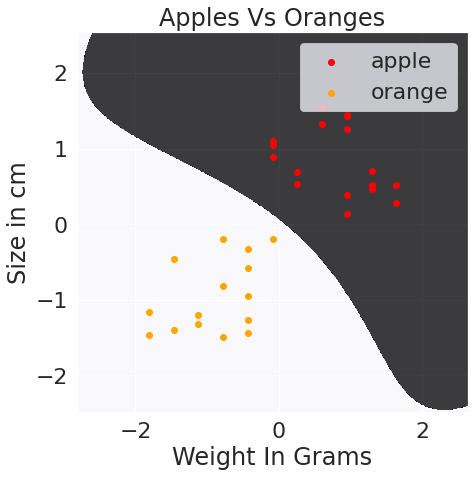

In [262]:
## Lets visualize training 
from matplotlib.colors import ListedColormap
# Creating set for X and y train
X_set, Y_set = X_train, y_train

plt.figure(figsize=(7, 7))
# creating meshgrid with X_set
x1, x2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1,
              step=0.01))

plt.contourf(x1,
             x2,
             clf.predict(np.array([x1.ravel(),
                                   x2.ravel()]).T).reshape(x1.shape),
             alpha=.75,
             cmap=ListedColormap(('black', 'white')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0],
                X_set[Y_set == j, 1],
                color=ListedColormap(('red', 'orange'))(i),
                label=j)

plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend(loc="upper right")
plt.show()

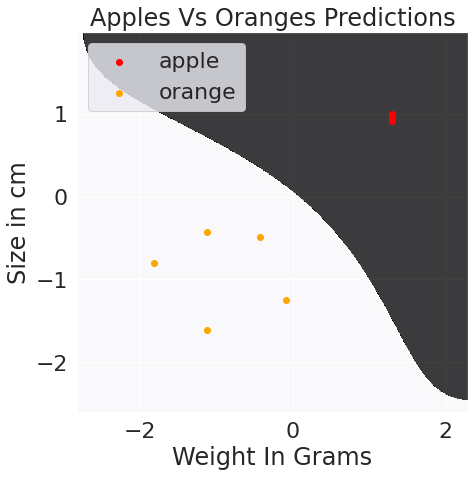

In [265]:
## Let's visualize testing set

plt.figure(figsize=(7, 7))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1,
              step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1,
              step=0.01))
plt.contourf(X1,
             X2,
             clf.predict(np.array([X1.ravel(),
                                   X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap=ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set == j, 1],
                color=ListedColormap(('red', 'orange'))(i),
                label=j)
plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend(loc='upper left')
plt.show()